In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
    [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return len(M),len(M[0])

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for row in M:
        for i in range(len(row)):
            row[i]=round(row[i],decPts)

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.060s

OK


## 1.4 计算矩阵的转置

In [9]:
# TODO 计算矩阵的转置
def transpose(M):
    '''
    zip函数是同时迭代入参中的每个列表，
    每个列表中同一个位置上的值被拼成同一个元组（元组中按所在的列表位置排列），
    然后以列表形式返回生成的多个元组；
    
    由于M列表是二维数组，所以放入zip函数中的话，
    必须把M 里的各个成员作为参数列表传入，
    不然只传了一个一个列表，
    所以这里用到了星号操作符
    '''
    return [list(col) for col in zip(*M)]

In [10]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


## 1.5 计算矩阵乘法 AB

In [59]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    row_len_A=len(A)
    col_len_A=len(A[0])
    row_len_B=len(B)
    col_len_B=len(B[0])
    M=[]
    if col_len_A!=row_len_B:
        raise ValueError('Cannot multiply')
    else:
        for i in range(row_len_A):
            M.append([])
            for j in range(col_len_B):
                M[i].append(sum([x*y for x,y in zip(A[i],[n[j] for n in B])]))
    return M



In [60]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.113s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [61]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    return [ra+rb for ra,rb in zip(A,b)]


In [62]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [63]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
import copy
def swapRows(M, r1, r2):
    tmp=copy.deepcopy(M[r1])
    M[r1]=copy.deepcopy(M[r2])
    M[r2]=tmp
    
    

In [64]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [65]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if not scale:
        raise ValueError('Cannot scale zero')
    else:
        M[r]=[x*scale for x in M[r]]

In [66]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [33]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1]=[x+y*scale for x,y in zip(M[r1],M[r2])]

In [34]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为奇异矩阵，矩阵A为非奇异矩阵两种情况。

In [39]:
# 不要修改这里！
from helper import *
    
rank = 4
A = generateMatrix(rank,seed,singular=False)
b = np.ones(shape=(rank,1)) # it doesn't matter
printInMatrixFormat(rank,A,b)

    7,    5,    3,   -5 || 1    
   -4,    6,    2,   -2 || 1    
   -9,    4,   -5,    9 || 1    
   -9,  -10,    5,   -4 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$ Ab = \begin{bmatrix}
    7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\\
    -9 & -10 & 5 & -4 & 1\end{bmatrix}$
    
$-> \begin{bmatrix}
	 1 & -0.44 & 0.56 & -1 & -0.11\\
    0 & 4.22 & 4.22 & -6 & 0.56\\
    0 & 8.11 & -0.89 & 2 & 1.78\\
    0 & -14 & 10 & -13 & 0\end{bmatrix}$
  
$->\begin{bmatrix}
	 1 & 0 & 0.24 & -0.59 & -0.11\\
	 0 & 1 & -0.71 & 0.93 & 0\\
    0 & 0 & 4.9 & -5.53 & 1.78\\
    0 & 0 & 7.24 & -9.92 & 0.56\end{bmatrix}$
$->\begin{bmatrix}
	 1 & 0 & 0 & -0.26 & -0.13\\
	 0 & 1 & 0 & -0.05 & 0.05\\
    0 & 0 & 1 & -1.37 & 0.77\\
    0 & 0 & 0 & 1.19 & 1.4\end{bmatrix}$
    
$->\begin{bmatrix}
	 1 & 0 & 0 & 0 & 0.18\\
	 0 & 1 & 0 & 0 & 0.11\\
    0 & 0 & 1 & 0 & 1.69\\
    0 & 0 & 0 & 1 & 1.18\end{bmatrix}$
    
$->返回最后一列\begin{bmatrix}
0.18\\
0.11\\
1.69\\
1.18\end{bmatrix}$

In [50]:
# 不要修改这里！
rank = 4
A = generateMatrix(rank,seed,singular=True)
b = np.ones(shape=(rank,1)) # it doesn't matter

printInMatrixFormat(rank,A,b)

   -7,   -3,    1,   -9 || 1    
    0,    0,    0,    0 || 1    
   -2,    7,    7,   -3 || 1    
    8,   -5,   -6,    3 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$ Ab = \begin{bmatrix}
    -7 & -3 & 1 & -9 & 1\\
    0 & 0 & 0 & 0 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    8 & -5 & -6 & 3 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -0.63 & -0.75 & 0.38 & 0.13\\
    0 & 0 & 0 & 0 & 1\\
    0 & 5.75 & 5.5 & -2.25 & 1.25\\
    0 & -7.38 & -4.25 & -6.38 & 1.88\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -0.39 & 0.92 & -0.03\\
    -0 & 1 & 0.58 & 0.86 & -0.25\\
    0 & 0 & 2.19 & -7.2 & 2.71\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$
    
$--> \begin{bmatrix}
    1 & 0 & 0 & -0.37 & 0.45\\
    -0 & 1 & 0 & 2.77 & -0.97\\
    0 & 0 & 1 & -3.30 & 1.24\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}
$

$->对角线上第四行第四列数值为0 ，所以A为奇异矩阵，返回None
$

### 2.3.3 实现 Gaussian Jordan 消元法

In [52]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if len(A)==len(b):
        M=augmentMatrix(A,b)
        m,n=shape(A)
        i,j=0,0
        while i<m and j<n:
            maxi=i
            for k in range(i+1,m):
                if abs(M[k][j])*1.0>abs(M[maxi][j])*1.0:
                    maxi=k  #使用交换法找出最大值（绝对值最大）
            
            if not  abs(M[maxi][j])<epsilon: #判定找到的绝对值最大值是否为零：
                swapRows(M, maxi, i) #将第i行与找到的最大值所在行
                scaleRow(M, i, 1.0/M[i][j])
                for u in range(m):
                    if u!=i and  abs(M[u][j])>epsilon:
                        scale=-1.0*(M[u][j])
                        addScaledRow(M, u,i, scale)
                i+=1
            else:
                return None
            j+=1
        tmp=[[x[-1]] for x in M]
        matxRound(tmp,decPts)
        return tmp
        
    return None



In [53]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 4.729s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

3.23389074254 7.18602744851


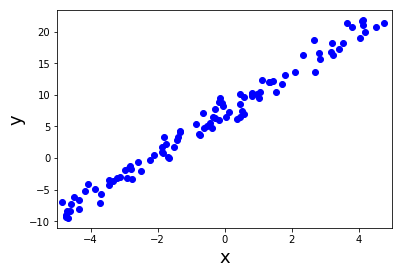

In [54]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

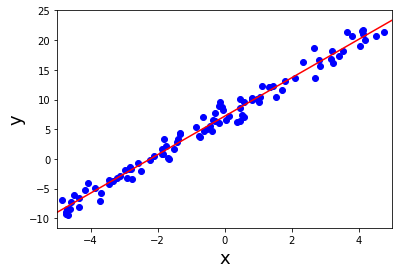

In [55]:
#TODO 请选择最适合的直线 y = kx + b
k = 3.23389074254
b = 7.18602744851

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [k*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [56]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    return sum([(y-m*x-b)**2 for x,y in zip(X,Y)])/len(X)
        

print(calculateMSE(X,Y,k,b))

1.35503757538


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明: 
目标函数E代表的是点到模拟直线在y轴上的距离（平方是把距离取正，避免正负符号导致影响距离的计算），而最小化目标函数是为了让模拟直线最接近散点的带状的“中心”,由于方程有两个变量，求极值需要用到偏导数


### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

- 目标函数 $E$ :

$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2} 
= \frac{1}{2}( (1 - m -b) + (2-2m-b) + (2-3m-b) )
$$
$$
= \frac{1}{2}(5-6m-3b)
$$


- 二元二次方程组 :

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
=
\begin{cases}
\displaystyle
{-1(1 - m - b)  -2(2 - 2m - b) -3(2 - 3m - b)} =0 \\
\\
\displaystyle
{-(1 - m - b)-(2 - 2m - b)-(2 - 3m - b)} =0 \\
\end{cases}
$$
$$
=
\begin{cases}
\displaystyle
{14m+6b-11} =0 \\
\\
\displaystyle
{6m+3b-5} =0 \\
\end{cases}
$$



- 求解最优参数 $m, b$ :
$$
m =\frac{1}{2} , 
b = \frac{2}{3}
$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:
$$
X^TXh - X^TY 
= \begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1
\end{bmatrix} 
\begin{bmatrix}
    x_1 & 1  \\
    x_2 & 1  \\
    ... & ...  \\
    x_n & 1  \\
\end{bmatrix}
\begin{bmatrix}
    m  \\
    b
\end{bmatrix} -
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1
\end{bmatrix} 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n  \\
\end{bmatrix}
$$


$$
= \begin{bmatrix}
    ({x_1^2}+{x_2^2}+...+{x_n^2})  &  (x_1 + x_2 + ... + x_n)\\
    (x_1 + x_2 + ... + x_n) & (1 + 1 + ... + 1)
\end{bmatrix}
\begin{bmatrix}
    m  \\
    b
\end{bmatrix}
-
\begin{bmatrix}
    (x_1y_1+x_2y_2+...+x_ny_n)  \\
    (y_1 + y_2 + ... + y_n)
\end{bmatrix}
$$


$$
=\begin{bmatrix}
    ({x_1^2}+{x_2^2}+...+{x_n^2})m + (x_1 + x_2 + ... + x_n)b\\
    (x_1 + x_2 + ... + x_n)m + (1 + 1 + ... + 1)b
\end{bmatrix}
-
\begin{bmatrix}
    (x_1y_1+x_2y_2+...+x_ny_n)  \\
    (y_1 + y_2 + ... + y_n)
\end{bmatrix}
$$

$$
=\begin{bmatrix}
({x_1^2}+{x_2^2}+...+{x_n^2})m + (x_1 + x_2 + ... + x_n)b-(x_1y_1+x_2y_2+...+x_ny_n) \\
(x_1 + x_2 + ... + x_n)m + (1 + 1 + ... + 1)b-(y_1 + y_2 + ... + y_n)
\end{bmatrix}
$$

$$
=\begin{bmatrix}
\sum_{i=1}^{n}{x_i(mx_i+b-y_i)} \\
\sum_{i=1}^{n}{mx_i+b-y_i}
\end{bmatrix}
$$

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [67]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    #利用高斯消元法求 h
    X_ = [[x,1] for x in X]
    Y_ = [[y] for y in Y]
    h=gj_Solve(matxMultiply(transpose(X_),X_),matxMultiply(transpose(X_),Y_))
    return h[0][0],h[1][0]


m,b = linearRegression(X,Y)
print(m,b)

(3.2379, 7.1899)


你求得的回归结果是什么？它足够好了吗？请使用运行以下代码将它画出来。

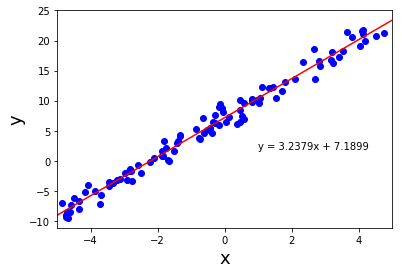

In [68]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b


plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
#plt.scatter(x,y,c='b')
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()